In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
from api import read
from segment import seg

In [2]:
prefix = '/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/23_01_2020/'

In [7]:
stats = glob(os.path.join(prefix, 'D_5/Chip_*_stats.csv' ))

In [8]:
stats

['/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/23_01_2020/D_5/Chip_1_stats.csv',
 '/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/23_01_2020/D_5/Chip_4_stats.csv']

In [30]:
table = pd.read_csv(stats[0], index_col=0)

In [45]:
table

,well_index,x,y,area,eccentricity,major_axis_length
0,0,NaN,NaN,NaN,NaN,NaN
1,1,625.541572,717.290022,18871.0,0.785352,198.306358
2,2,518.947152,760.585046,5109.0,0.363338,83.899607
3,3,711.785113,758.998985,19708.0,0.658798,183.646862
4,4,523.551495,674.414241,15322.0,0.149168,140.529062
5,5,758.890723,693.764604,15081.0,0.564767,152.765328
6,6,656.614052,681.730790,14888.0,0.743454,168.745967
7,7,709.035498,633.231221,25720.0,0.434406,191.224246
8,8,671.882045,644.708076,20245.0,0.872392,233.792066
9,9,NaN,NaN,NaN,NaN,NaN


In [31]:
table[table.eccentricity > 0.75]

,well_index,x,y,area,eccentricity,major_axis_length
1,1,625.541572,717.290022,18871.0,0.785352,198.306358
8,8,671.882045,644.708076,20245.0,0.872392,233.792066
11,11,647.790947,625.459259,20655.0,0.782386,207.975668
13,13,698.360651,696.272327,15228.0,0.882311,207.630160
22,22,564.492994,573.806889,23836.0,0.793827,224.764779
23,23,617.040394,614.727235,21711.0,0.757227,206.783285
27,27,985.379250,80.677419,1147.0,0.948204,76.682890
41,41,483.455992,592.661238,8044.0,0.791391,132.789442


In [26]:
reader = read.nd2(stats[0].replace('_stats.csv', '.nd2'))

/Users/andrey/miniconda3/envs/nd2/lib/python3.8/site-packages/pims/base_frames.py:522: UserWarning: Please call FramesSequenceND.__init__() at the start of thethe reader initialization.
  warn("Please call FramesSequenceND.__init__() at the start of the"


In [27]:
reader

nd2 dataset from `/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/23_01_2020/D_5/Chip_1.nd2`,
        ranges: {'x': 2048, 'y': 2044, 'm': 47},
        channels: ['DaFiTr']
        pixel size: 1.625 um

In [91]:
def crop_centers(table, reader, size=500):
    img_array = []
    good_table = table[table.eccentricity > 0.75][table.major_axis_length > 200][table.major_axis_length < 600]
    for i, x, y in zip((t := good_table).well_index, t.x, t.y):
        print(i, x, y)
        im = reader.get_single_image(m=i)
        c_im = seg.crop_center(im.array)
        crop = c_im[int(y) - size //2: int(y) + size //2, 
                        int(x) - size //2: int(x) + size //2]
        if max(crop.shape) == size and min(crop.shape) > 0:
            img_array.append({"well": i, "crop": crop})
            print(f'added {crop.shape}')
        else:
            print(f'refused {crop.shape}')
    return img_array

In [96]:
def show_crops(img:list):
    fig, ax = plt.subplots(1, len(img), dpi=150)
    for a, c in zip(ax, img):
        a.imshow(c["crop"], cmap='gray') 
        a.set_title(c["well"], size=6)
        a.axis('off')
    return fig

In [97]:
def get_long_crops(stats_path, nd2_path, size=500):
    reader = read.nd2(nd2_path)
    table = pd.read_csv(stats_path, index_col=0)
    crops = crop_centers(table, reader, size=size)
    fig = show_crops(crops)
    return fig

/Users/andrey/miniconda3/envs/nd2/lib/python3.8/site-packages/pims/base_frames.py:522: UserWarning: Please call FramesSequenceND.__init__() at the start of thethe reader initialization.
  warn("Please call FramesSequenceND.__init__() at the start of the"
<ipython-input-91-fa33e2cb0d59>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_table = table[table.eccentricity > 0.75][table.major_axis_length > 200][table.major_axis_length < 600]


8 671.8820449493703 644.7080760681649
added (500, 500)
11 647.7909465020576 625.4592592592593
added (500, 500)
13 698.3606514315734 696.2723272918307
added (500, 500)
22 564.4929937909045 573.8068887397213
added (500, 500)
23 617.0403942701856 614.7272350421446
added (500, 500)


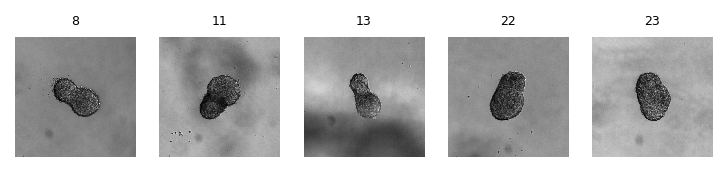

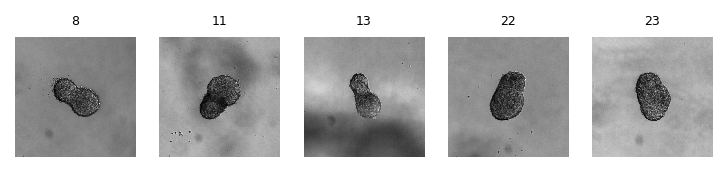

In [98]:
get_long_crops(stats[0], stats[0].replace('_stats.csv', '.nd2'))

<ipython-input-91-fa33e2cb0d59>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_table = table[table.eccentricity > 0.75][table.major_axis_length > 200][table.major_axis_length < 600]


0 931.9335897141547 177.41751808058777
refused (0, 343)
1 314.3083801206072 103.54761904761904
refused (0, 500)
2 269.7348519674104 155.3002709284925
refused (0, 500)
3 420.41417654130174 124.4921432251417
refused (0, 500)
16 552.0094938780857 638.7169842205199
added (500, 500)
17 628.8083933583579 664.6272699604343
added (500, 500)
19 682.7468899370074 655.2269633756449
added (500, 500)
26 547.299082500373 787.8649858272415
added (485, 500)
27 532.9264921765906 733.0506641841812
added (500, 500)
28 803.1664903744447 163.22344686552432
refused (0, 471)
29 583.9483787707695 733.3416142388558
added (500, 500)
36 510.6876238050125 851.0005167513565
added (421, 500)
39 957.5844127428672 928.8802293015927
refused (344, 317)
52 524.3766348669026 842.0772426527158
added (430, 500)


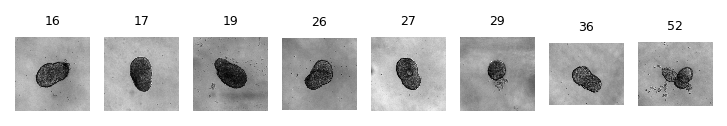

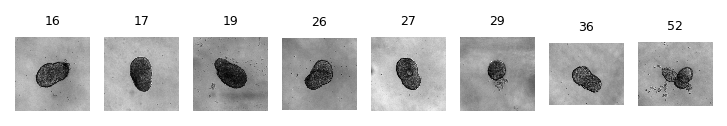

In [99]:
get_long_crops(stats[1], stats[1].replace('_stats.csv', '.nd2'))

Day_5, chip_1


<ipython-input-91-fa33e2cb0d59>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_table = table[table.eccentricity > 0.75][table.major_axis_length > 200][table.major_axis_length < 600]


8 671.8820449493703 644.7080760681649
added (500, 500)
11 647.7909465020576 625.4592592592593
added (500, 500)
13 698.3606514315734 696.2723272918307
added (500, 500)
22 564.4929937909045 573.8068887397213
added (500, 500)
23 617.0403942701856 614.7272350421446
added (500, 500)


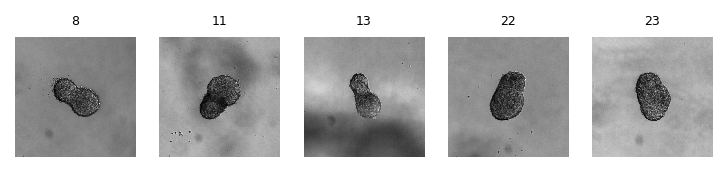

Day_5, chip_4
0 931.9335897141547 177.41751808058777
refused (0, 343)
1 314.3083801206072 103.54761904761904
refused (0, 500)
2 269.7348519674104 155.3002709284925
refused (0, 500)
3 420.41417654130174 124.4921432251417
refused (0, 500)
16 552.0094938780857 638.7169842205199
added (500, 500)
17 628.8083933583579 664.6272699604343
added (500, 500)
19 682.7468899370074 655.2269633756449
added (500, 500)
26 547.299082500373 787.8649858272415
added (485, 500)
27 532.9264921765906 733.0506641841812
added (500, 500)
28 803.1664903744447 163.22344686552432
refused (0, 471)
29 583.9483787707695 733.3416142388558
added (500, 500)
36 510.6876238050125 851.0005167513565
added (421, 500)
39 957.5844127428672 928.8802293015927
refused (344, 317)
52 524.3766348669026 842.0772426527158
added (430, 500)


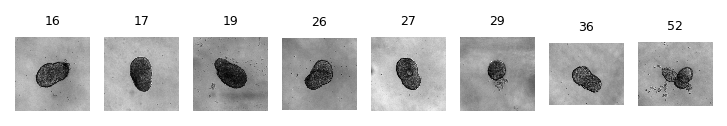

Day_6, chip_1
1 636.2140262333269 729.7928787332576
added (500, 500)
8 694.4709123167429 669.5391415320447
added (500, 500)
11 667.3612198183564 634.5617170001723
added (500, 500)
15 617.1362376580634 513.7389572146196
added (500, 500)
43 579.5503524672707 691.9847393291502
added (500, 500)
46 264.6573015800737 562.4603160147533
added (500, 500)


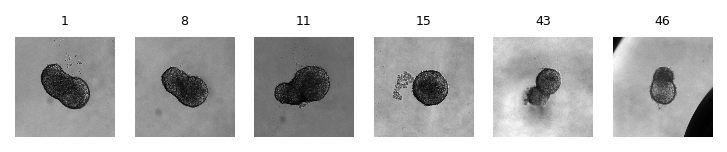

Day_6, chip_4
3 821.3137824835733 172.97650868753018
refused (0, 453)
14 380.21045271391324 945.1415264280637
added (327, 500)
15 443.7000785428432 930.7377978082808
added (342, 500)
17 538.1759843297932 716.810430032167
added (500, 500)
21 509.97391079933374 732.3399103770265
added (500, 500)
25 427.3870457577551 130.2643683238649
refused (0, 500)
28 121.3093152866242 787.8685489139311
refused (485, 0)
30 155.59236821400472 785.7588512981903
refused (487, 0)
34 428.9593377843467 184.06660380884426
refused (0, 500)
40 440.4858587074257 523.9225337986921
added (500, 500)
41 48.926829268292686 124.64922788281136
refused (0, 0)
43 441.0567167983686 749.4832611096948
added (500, 500)
51 136.06530115595214 66.72676265801393
refused (0, 0)


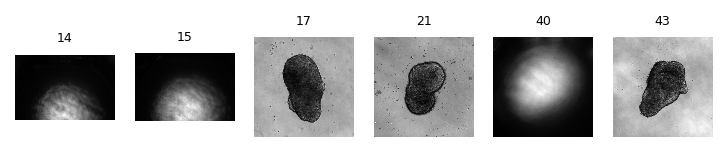

Day_7, chip_1
1 658.8344911361652 680.5852218805754
added (500, 500)
11 699.8863222341165 596.1040434202866
added (500, 500)
28 437.9000563784532 117.85664496950442
refused (0, 500)
29 941.6157660392633 77.75065776158672
refused (0, 333)
43 621.2879312403007 620.4225259639489
added (500, 500)


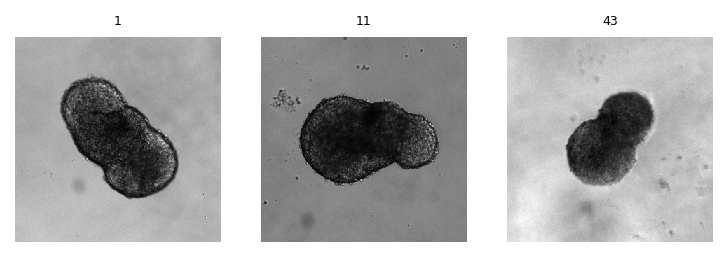

Day_7, chip_4
1 864.9297603386146 335.60698964708575
added (500, 410)
2 299.25692016256227 890.0195024659729
added (382, 500)
9 644.9944406179278 743.8846797205548
added (500, 500)
24 625.7535159721859 780.1267057039787
added (492, 500)
28 234.8148569855609 853.7393708866143
refused (419, 0)
30 211.3733685005046 884.1830078108436
refused (388, 0)
34 88.72434881087204 242.2039826349566
refused (0, 0)
40 30.158042578356003 131.17179183914845
refused (0, 0)
41 170.68419762167463 95.21049405418657
refused (0, 0)
46 601.3170400015542 895.5012725118022
added (377, 500)
50 58.444420035149385 77.62236379613357
refused (0, 0)
51 901.3999049954424 151.43052470760418
refused (0, 373)
53 513.0091331329768 686.8474298427071
added (500, 500)


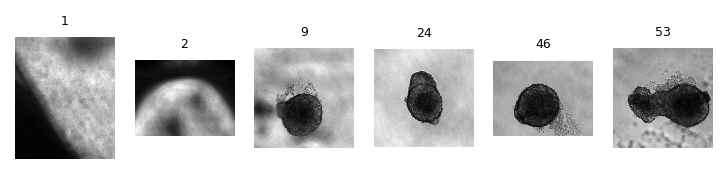

In [101]:
for day in (5, 6, 7):
    for chip in (1, 4):
        print(f'Day_{day}, chip_{chip}')
        stats = os.path.join(prefix, f'D_{day}/Chip_{chip}_stats.csv')
        nd2 = stats.replace('_stats.csv', '.nd2')
        get_long_crops(stats, nd2)
        plt.show()

In [105]:
prefix2 = '/Volumes/Multicell/Sebastien/mESC_aggregates/SUMO/Cell_number/14022020_SUMO-number/'

Day_5, chip_100


<ipython-input-91-fa33e2cb0d59>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_table = table[table.eccentricity > 0.75][table.major_axis_length > 200][table.major_axis_length < 600]


11 720.0807614820869 548.6096236386464
added (500, 500)
15 610.529026932836 510.33832655681573
added (500, 500)
16 373.18712549221016 474.95856873822976
added (500, 500)
17 657.8252059582259 622.4955479737039
added (500, 500)
28 675.810053015054 713.4201797408783
added (500, 500)
30 738.2364911248407 649.9146317544377
added (500, 500)
35 707.0472527472529 648.6099964551578
added (500, 500)
42 616.8006412983018 591.8290089323692
added (500, 500)
55 632.642323998328 661.169343763062
added (500, 500)


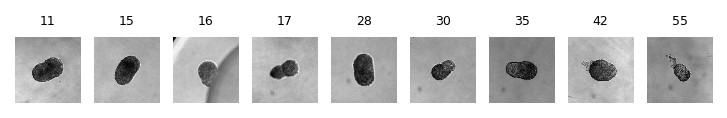

Day_5, chip_300
0 735.6895156901868 723.4656992563033
added (500, 500)
5 110.47988709560686 174.05914453209812
refused (0, 0)
7 46.929912569872435 76.52235918016339
refused (0, 0)
9 671.4590803083441 735.5790710508983
added (500, 500)
27 763.712614360118 670.1252730133032
added (500, 500)
34 422.18626899268435 642.7190958544363
added (500, 500)
42 311.4766634242905 597.5856072629226
added (500, 500)
46 648.8803883909518 804.7192701664533
added (468, 500)
49 569.5751478759635 745.5441611399893
added (500, 500)
54 75.19619332585296 127.33948385488094
refused (0, 0)


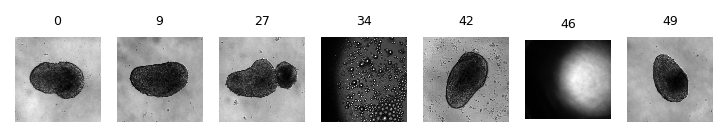

In [107]:
for day in (5,):
    for chip in (100, 300):
        print(f'Day_{day}, chip_{chip}')
        stats = os.path.join(prefix2, f'D{day}/{chip}_stats.csv')
        nd2 = stats.replace('_stats.csv', '.nd2')
        get_long_crops(stats, nd2)
        plt.show()